Environment:
- windows
- python 3.6.0

In [45]:
print('test')

test


import model, define global params.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

iteration_times = 500   # iteration times
train_valid_ratio = 0.8   # determine the ratio of train to validation data

**step 1:** load house dataset by load_svmlight_file function, and print data and label shape

In [47]:
house = load_svmlight_file('E:/Master/personal/实验和作业/机器学习/data/housing_scale.svm')
print('data shape:', house[0].shape, '----label shape:', house[1].shape)

data shape: (506, 13) ----label shape: (506,)


**step 2:** split all data into train and validation by train_test_split with the train_valid_ratio

In [48]:
def prepare_data(x, y, train_test_ratio = train_valid_ratio, shuffle = False):
    x_train, x_valid, y_train, y_valid = train_test_split(x, y,
                            train_size=train_valid_ratio, test_size=1-train_valid_ratio, shuffle=shuffle)   # point out the test size
    print('train data shape:', x_train.shape, '---validation data shape:', x_valid.shape)
    return x_train, x_valid, y_train, y_valid

**step 3:** linear model, initial params with normal distribution, weight matrix and bias term
- w * x's shape is equal to label shape.

In [66]:
def norm_weight(nin, scale = 0.01):
    """
    weight initializer, defalt scale 0.01
    """
    w = scale * np.random.randn(nin)
    b = scale * np.random.randn()
    # print('weight shape:', w.shape)
    return w, b

**step 4-8:** choose loss function, calculate gradient and update params
- using linear model and square loss function.
- gradient descent, compute and update the gradient of weight and bias.

In [82]:
def linear_model(x, w, b):
    try:
        y = x * w + b
        return y
    except Exception as e:
        print("x don't match w...")

def loss_function(y, y_pred):
    return 0.5 * np.mean(np.square(y - y_pred))   # use square loss function

def update_params(x, y, y_pred, w, b, alpha):
    # use square loss function, update w and b by its gradient
    w = w - alpha*(y_pred - y_train)*x_train/x_train.shape[0]    # alpha is learning rate
    b = b - alpha*np.mean(y_pred - y_train)
    return w, b   

**step 9-1:** run step 4-8 iteratively, beside that, we can adjust some hyper params.

In [108]:
alpha = [0.36, 0.1, 0.01]    # different learning rate
x_train, x_valid, y_train, y_valid = prepare_data(house[0], house[1])   # prepare train and test data
train_total_loss = []    # train loss value
valid_total_loss = []    # test loss value

# iteration with different learning rate
for a in alpha:
    train_loss = []
    valid_loss = []
    w, b = norm_weight(x_train.shape[1])    # initialize weight and bias
    for i in range(iteration_times):
        # linear model, and train loss
        y_pred = linear_model(x_train, w, b)
        loss_t = loss_function(y_train, y_pred)    # square loss function of train data
        train_loss.append(loss_t)

        # linear model, and validation loss
        y_valid_pred = linear_model(x_valid, w, b)
        loss_v = loss_function(y_valid, y_valid_pred)  # square loss function of validation data
        valid_loss.append(loss_v)

        #if i % (iteration_times/2) == 0:  # print info
            #print('alpha:', a, 'iteration:', i)

        w, b = update_params(x_train, y_train, y_pred, w, b, a)
    
    print('learning rate:', a, "---min train loss:", min(train_loss), '--min valid loss:', min(valid_loss))
    train_total_loss.append(train_loss)
    valid_total_loss.append(valid_loss)

train data shape: (404, 13) ---validation data shape: (102, 13)
learning rate: 0.36 ---min train loss: 11.3908122706 --min valid loss: 10.2732423383
learning rate: 0.1 ---min train loss: 11.5822820653 --min valid loss: 10.2666578344
learning rate: 0.01 ---min train loss: 16.6127728337 --min valid loss: 14.2956481648


**step 9-2:** draw the graph of train and validation loss 

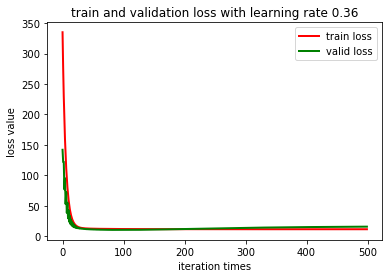

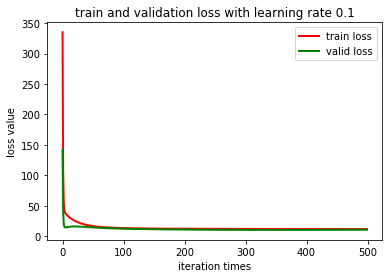

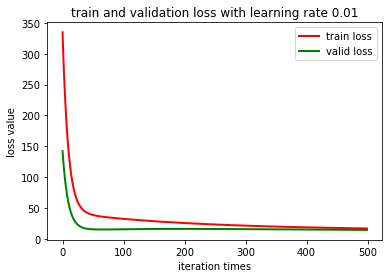

In [106]:
# plot params
fig_config = {    # train line
    'label':['train loss', 'valid loss'],     # validation line
    'color': ['r', 'g'],
}
# train loss plt with different alpha
for i in range(len(alpha)):
    plt.figure()
    plt.title('train and validation loss with learning rate '+ str(alpha[i]))
    plt.plot(range(len(train_total_loss[i])), train_total_loss[i], linewidth=2.0, 
             color=fig_config['color'][0], label=fig_config['label'][0])
    plt.plot(range(len(valid_total_loss[i])), valid_total_loss[i], linewidth=2.0, 
             color=fig_config['color'][1], label=fig_config['label'][1])
    plt.xlabel('iteration times')
    plt.ylabel('loss value')
    plt.legend()
    plt.show()